In [26]:
import ee
import numpy as np
import matplotlib.pyplot as plt

Initialize the Earth Engine client.

In [2]:
ee.Initialize()

Download and stack datasets from diferent Areas of Interest (AOIs)

In [81]:
# Central position of (AOIs)
points = [[-112.835, 43.015], [-117.337, 46.872], [-90.223, 36.045], [-119.5404, 36.2631]]

In [82]:
from sentinel2_cropland_datasets import sentinel2_cropland_datasets

for n, point in enumerate(points):
    scd = sentinel2_cropland_datasets(point = point, buffer = 2000 , startDate = '2016-01-01', stopDate = '2016-12-31', scale = 30)
    dataset_x, dataset_y = scd.read_datasets()
    if n == 0:
        data_x = dataset_x
        data_y = dataset_y
    else:
        szy1, szx1 = data_x.shape[:2]
        szy2, szx2 = dataset_x.shape[:2]
        if szy1 != szy2 or szx1 != szx2:
            szy = min(szy1, szy2)
            szx = min(szx1, szx2)
            
            data_x = np.stack((data_x[:szy,:szx,:], dataset_x[:szy,:szx,:]), axis=0)
            data_y = np.stack((data_y[:szy,:szx,:], dataset_y[:szy,:szx,:]), axis=0)
        else:
            data_x = np.stack((data_x, dataset_x), axis=0)
            data_y = np.stack((data_y, dataset_y), axis=0)
            
    print('szy:',szy, 'szx:', szx)

url:  https://earthengine.googleapis.com/api/download?docid=2b7c10a8a593f240cd88684ef8155fd4&token=a336a7bc4408918af1f2f5339a2ed94a
Download complete!
url:  https://earthengine.googleapis.com/api/download?docid=727fe119ca38481344540347688e2744&token=77e0405f896b23890124dad17146b70e
Download complete!
szy: 135 szx: 182
url:  https://earthengine.googleapis.com/api/download?docid=d3a68b13d00da92b69992d6120065bea&token=bdc86b7b7b2b71746c46f53c0a1e638d
Download complete!
url:  https://earthengine.googleapis.com/api/download?docid=833d1ea4b7d049bb99a063cd464f748d&token=027c3109be1a2954f623f1a0ffabd7da
Download complete!
szy: 135 szx: 182
url:  https://earthengine.googleapis.com/api/download?docid=d9cec533c8a87ccc0c9282c024d11914&token=8fe8c9ff3d235d595ca1bfcff53101bf
Download complete!
url:  https://earthengine.googleapis.com/api/download?docid=ac727cefcd64465e06487c888af9bfc3&token=a0bda87d273112606b654e3279416b59
Download complete!


ValueError: all input arrays must have the same shape

In [109]:
dataset_x.shape

(135, 165, 5)

In [84]:
dataset_y.shape

(135, 165, 1)

In [107]:
data_x.shape

(2, 135, 182, 5)

In [86]:
data_y.shape

(2, 135, 182, 1)

In [95]:
dataset1_x = dataset_x.reshape((1,dataset_x.shape[0],dataset_x.shape[1], dataset_x.shape[2]))

In [108]:
dataset1_x.shape

(1, 135, 165, 5)

In [106]:
data1_x = np.concatenate((data_x[:,:szy,:szx,:], dataset1_x[:,:szy,:szx,:]), axis=0)

In [104]:
data1_x.shape

(3, 2, 135, 5)

In [93]:
data1_x.shape

(2, 135, 182, 5)

**Display channels**

In [72]:
def display_channels(data, nChannels, titles = False):
    if nChannels == 1:
        plt.figure(figsize=(5,5))
        plt.imshow(data[:,:,0])
        if titles:
            plt.title(titles[0])
    else:
        fig, axs = plt.subplots(nrows=1, ncols=nChannels, figsize=(5*nChannels,5))
        for i in range(nChannels):
            ax = axs[i]
            ax.imshow(data[:,:,i])
            if titles:
                ax.set_title(titles[i])

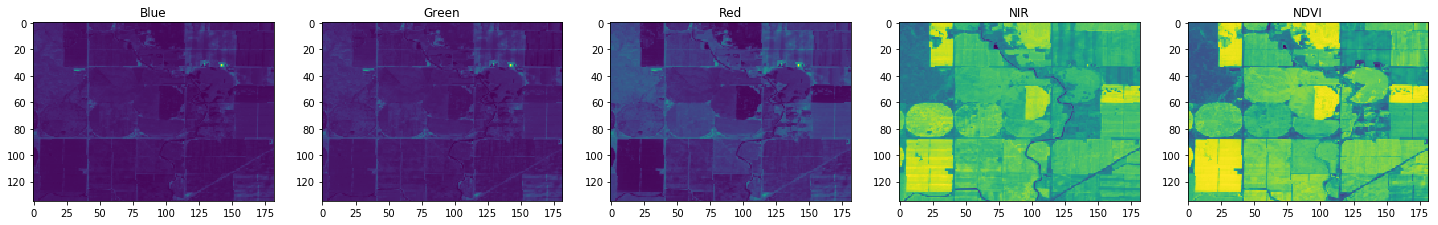

In [73]:
display_channels(data_x, data_x.shape[2], titles=['Blue', 'Green', 'Red', 'NIR', 'NDVI'])

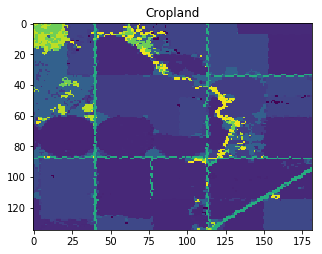

In [74]:
display_channels(data_y, data_y.shape[2], titles=['Cropland'])